---

![](https://ci3.googleusercontent.com/meips/ADKq_NalPsTE2pvOYWNLuTx5FQEiqMR2IICqwbE0yd07Lo5DBqNSujrNfI0xeljnYJEChVIFRqOWdClXUnsfUcUCm1Yrdz0t8BSxBTJ5h_V81xXqZVaqBPFHbfeSCOfVVm-Ti6Ip97bEaRmY7VQ4uEa--AnbpHKzgP0LNNc69HJnzQT1YigtFjsIRkNyXNXscnsPuWMxfVHTVSUshI1Tqjimq5Glw3mN0JUf0G3dtb0LUw=s0-d-e1-ft#https://empresas.alura.com.br/hs-fs/hubfs/488ef98e-4d3a-4c98-9ad4-70c297d9511a.png?width=536&upscale=true&name=488ef98e-4d3a-4c98-9ad4-70c297d9511a.pngraw=true)
   

Por **Luiz Henrique Leite dos Santos**

# #7DaysOfCode - Ciência de Dados 3/7: Forecasting

Prever valores futuros com base em dados históricos e padrões identificados.
   
---

## Importando Bibliotecas

In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np 

In [2]:
df = pd.read_csv('dataset_ceaps_forecasting.csv')
df.head()

,ds,y
0,2018-01-01,13062.46
1,2018-01-02,61972.66
2,2018-01-03,54424.44
3,2018-01-04,21775.57
4,2018-01-05,41703.32


In [19]:
df.tail()

,ds,y
1456,2021-12-27,28552.41
1457,2021-12-28,154547.27
1458,2021-12-29,22495.76
1459,2021-12-30,118345.56
1460,2021-12-31,27219.41


## Criando modelo utilizando Prophet

In [3]:
# Converter a coluna 'ds' para o tipo datetime
df['ds'] = pd.to_datetime(df['ds'])

In [4]:
df

,ds,y
0,2018-01-01,13062.46
1,2018-01-02,61972.66
2,2018-01-03,54424.44
3,2018-01-04,21775.57
4,2018-01-05,41703.32
...,...,...
1456,2021-12-27,28552.41
1457,2021-12-28,154547.27
1458,2021-12-29,22495.76
1459,2021-12-30,118345.56


In [5]:
m = Prophet() # Criar o modelo Prophet
m.fit(df) # Treinar o modelo

01:40:35 - cmdstanpy - INFO - Chain [1] start processing
01:40:35 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Fazer previsões para o futuro
futuro = m.make_future_dataframe(periods=365)  # Previsões para 365 dias adicionais
forecast = m.predict(futuro)

In [7]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1821,2022-12-27,86156.353235,33608.197103,135810.620998
1822,2022-12-28,86285.712997,36415.026418,139050.979493
1823,2022-12-29,71669.626601,24107.046606,127420.226935
1824,2022-12-30,58295.480298,5007.724833,110933.381069
1825,2022-12-31,7156.949553,-42399.332166,58821.898953


### Visualizando previsões 

c:\Users\Luis Henrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Luis Henrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


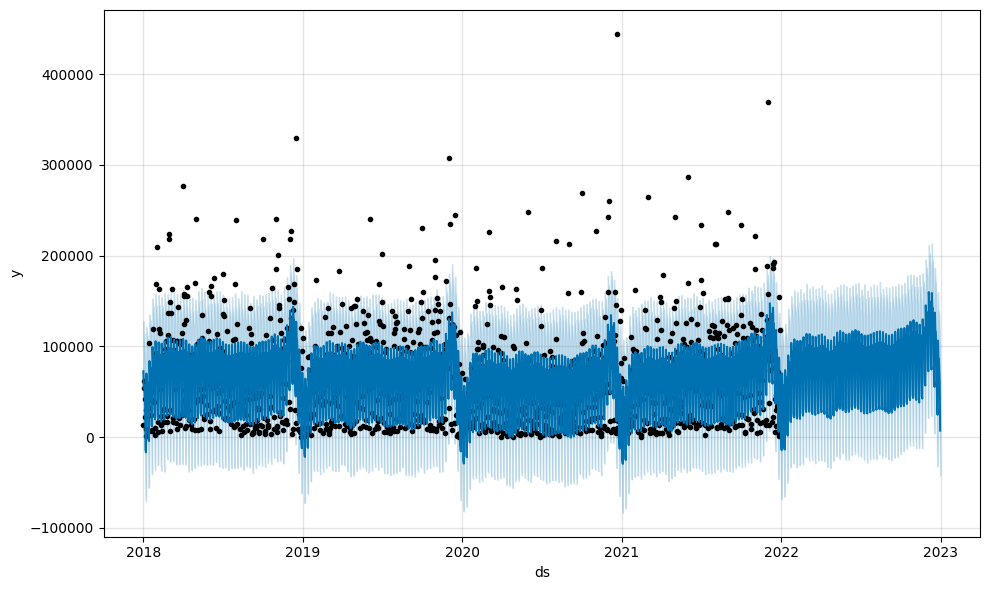

In [8]:
# Visualizar as previsões
fig1 = m.plot(forecast)

### Linhas de tendência 

c:\Users\Luis Henrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Luis Henrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\Luis Henrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this w

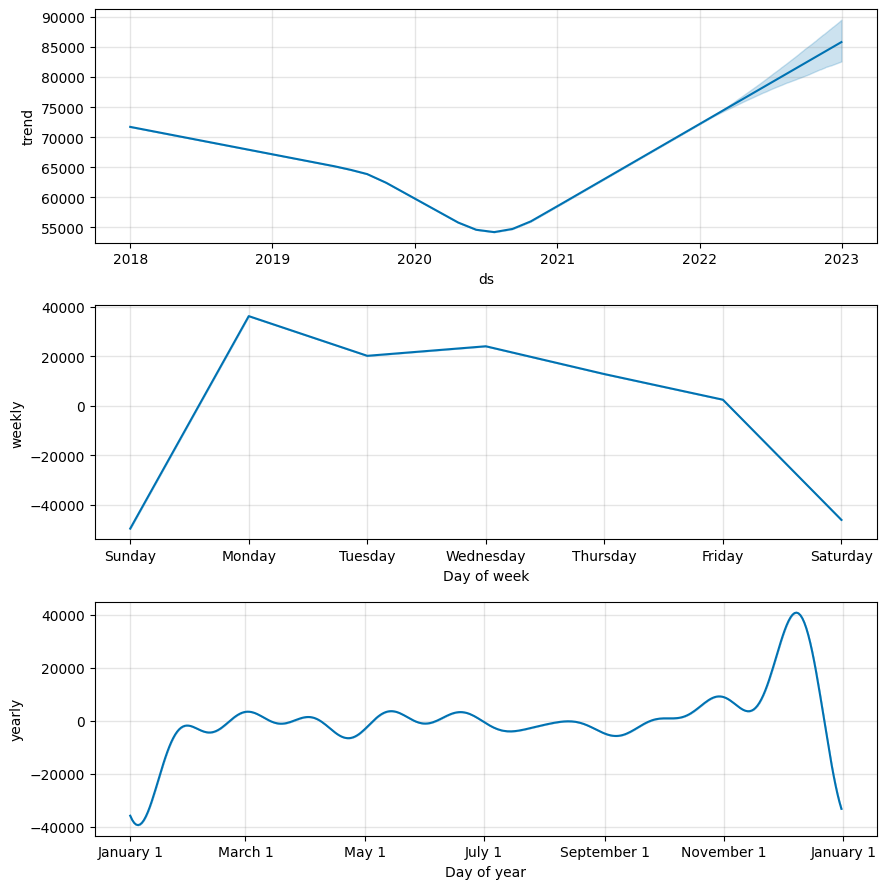

In [9]:
fig2 = m.plot_components(forecast)

In [10]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [11]:
plot_components_plotly(m, forecast)



Com base no modelo de previsão gerado, é identificado que os valores tendem a manter uma constância com base nos anos anteriores, não sendo visto nenhum acentuado desvio padrão.